In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1. 读取数据

In [2]:
def load_ICU_data(data_path, label_path):
    if(not data_path.endswith(".csv")):
        print("数据需要csv格式的文件！")
        return None
    if(not label_path.endswith(".csv")):
        print("标签需要csv格式的文件！")
        return None
    data_df = pd.read_csv(data_path)
    label_df = pd.read_csv(label_path)
    data = np.array(data_df)
    label = np.array(label_df)
    return data, label

## 2. Fisher线性判别

In [3]:
train1_data, train1_label = load_ICU_data("./data1forEx1to4/train1_icu_data.csv", "./data1forEx1to4/train1_icu_label.csv")
test1_data, test1_label = load_ICU_data("./data1forEx1to4/test1_icu_data.csv", "./data1forEx1to4/test1_icu_label.csv")

In [4]:
# Fisher判别器
class Fisher_classifier():
    def __init__(self):
        self.omega=0
        self.omega_0=0
        self.mean = None
        self. std = None
        
    def train(self, data, label, norm = True):
        self.mean = np.mean(data,axis=0,keepdims=True)
        self.std = np.std(data,axis=0,keepdims=True)
        if(norm):
            X = (data - self.mean)/(self.std + 1e-12) 
        else:
            X = data
        X1=X[np.where(label[:,0] == 0)]
        X2=X[np.where(label[:,0] == 1)]
        Y1=label[np.where(label[:,0] == 0)]
        Y2=label[np.where(label[:,0] == 1)]
        m1=np.mean(X1,axis=0,keepdims=True) #类均值向量
        m2=np.mean(X2,axis=0,keepdims=True) #类均值向量
        m=np.mean(X,axis=0,keepdims=True) #类均值向量
        m1_bar=np.mean(Y1)
        m2_bar=np.mean(Y2)
        S1=np.dot((X1-m1).T,(X1-m1))
        S2=np.dot((X2-m2).T,(X2-m2))
        S_w=S1+S2 #总类内散度矩阵
        S_b=np.dot((m1-m2).T,(m1-m2)) #类间散度矩阵
        self.omega=np.dot(np.linalg.inv(S_w),(m1-m2).T)
        #self.omega_0=-1/2*np.dot(m1+m2, self.omega)
        #self.omega_0=-1/2*(m1_bar+m2_bar)+1/(data.shape[0]-2)*np.log(X1.shape[0]/X2.shape[0])
        #self.omega_0=-np.mean(label)
        self.omega_0=-np.dot(m, self.omega)
        
        Y_predicted=np.dot((X),self.omega)+self.omega_0
        Y_predicted=np.where(Y_predicted < 0, 1, 0)
        Y=label.reshape(-1,1)
        correct = (Y_predicted == Y).sum()
        accuracy=correct/data.shape[0]
        Y_predicted=np.where(Y_predicted > 0, 2, 0)        
        sensitivity=(Y_predicted == Y).sum()/(Y==0).sum()
        Y_predicted=np.where(Y_predicted > 0, 1, -2) 
        specificity=(Y_predicted == Y).sum()/(Y==1).sum()
        print("训练准确率为%.4f，精确度为%.4f，特异度为%.4f"%(accuracy, sensitivity, specificity))

        return accuracy, sensitivity, specificity
    
    def test(self, data, label):
        if(self.mean is None):
            X = data
        else:
            X = (data - self.mean)/(self.std + 1e-12) 
        Y_predicted=np.dot((X),self.omega)+self.omega_0
        Y_predicted=np.where(Y_predicted < 0, 1, 0)
        Y=label.reshape(-1,1)
        correct=(Y_predicted==Y).sum()
        accuracy=correct/X.shape[0]
        Y_predicted=np.where(Y_predicted > 0, 2, 0)        
        sensitivity=(Y_predicted == Y).sum()/(Y==0).sum()
        Y_predicted=np.where(Y_predicted > 0, 1, -2) 
        specificity=(Y_predicted == Y).sum()/(Y==1).sum()
        print("测试准确率为%.4f，精确度为%.4f，特异度为%.4f"%(accuracy, sensitivity, specificity))
        
        return accuracy, sensitivity, specificity

In [5]:
print("数据不做标准化：")
train1_FLD = Fisher_classifier()
train1_FLD.train(train1_data, train1_label, norm = False)
train1_FLD.test(test1_data, test1_label)

数据不做标准化：
训练准确率为0.5648，精确度为0.5922，特异度为0.5384
测试准确率为0.5014，精确度为0.0055，特异度为1.0000


(0.5013673655423884, 0.005454545454545455, 1.0)

In [6]:
print("数据做标准化：")
train1_FLD = Fisher_classifier()
train1_FLD.train(train1_data, train1_label, norm = True)
train1_FLD.test(test1_data, test1_label)

数据做标准化：
训练准确率为0.7720，精确度为0.7580，特异度为0.7855
测试准确率为0.7521，精确度为0.7382，特异度为0.7660


(0.7520510483135825, 0.7381818181818182, 0.7659963436928702)

# 3. 感知器

In [7]:
train1_data, train1_label = load_ICU_data("./data1forEx1to4/train1_icu_data.csv", "./data1forEx1to4/train1_icu_label.csv")
test1_data, test1_label = load_ICU_data("./data1forEx1to4/test1_icu_data.csv", "./data1forEx1to4/test1_icu_label.csv")
train2_data, train2_label = load_ICU_data("./data1forEx1to4/train2_icu_data.csv", "./data1forEx1to4/train2_icu_label.csv")
test2_data, test2_label = load_ICU_data("./data1forEx1to4/test2_icu_data.csv", "./data1forEx1to4/test2_icu_label.csv")
train_data = np.concatenate([train1_data, train2_data], axis = 0)
train_label = np.concatenate([train1_label, train2_label], axis = 0)
test_data = np.concatenate([test1_data, test2_data], axis = 0)
test_label = np.concatenate([test1_label, test2_label], axis = 0)
#del train1_data, train1_label, test1_data, test1_label, train2_data, train2_label, test2_data, test2_label

In [8]:
toy_data1 =np.random.randint(0,10, (1000,10))
toy_data2 =np.random.randint(15,20, (1000,10))
toy_data = np.concatenate([toy_data1, toy_data2], axis=0)
toy_label1 = np.zeros((1000,1))
toy_label2 = np.ones((1000,1))
toy_label = np.concatenate([toy_label1, toy_label2], axis=0)

In [9]:
class Perceptron():
    def __init__(self, fixed_step = True):
        self.alpha = None
        self.fixed_step = fixed_step
        self.num_iterations = 0
        self.mean = None
        self.std = None
        self.loss = []
        
    def train(self, data, label):
        self.mean = np.mean(data,axis=0,keepdims=True)
        #print(self.mean.shape)
        self.std = np.std(data,axis=0,keepdims=True)
        #X=data
        X = (data-self.mean)/(self.std+1e-12)
        X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
        X1 = X[np.where(label[:,0] == 0)]
        X2 = -1*X[np.where(label[:,0] == 1)]
        X_new = np.concatenate([X1, X2], axis = 0)
        self.alpha = 0.001*np.zeros((X_new.shape[1],1))
        
        flag = True
        while(flag and self.num_iterations<=500):
            self.num_iterations += 1
            flag = False
            err_number = 0
            for i in range(X_new.shape[0]):
                x = X_new[i].reshape(1,-1)
                result = np.dot(x, self.alpha)
                if(result<=0):
                    self.loss.append(-result[0,0])
                    err_number+=1
                    flag = True
                    grad = x.T
                    if(self.fixed_step):
                        self.alpha = self.alpha + grad
                    else:
                        self.alpha = self.alpha + abs(result)/np.dot(x, x.T)*grad
                else:
                    #self.loss.append(0)
                    pass
            
        Y_predicted = np.dot(X, self.alpha)

        Y_predicted=np.where(Y_predicted <= 0, 1, 0)
        Y=label.reshape(-1,1)
        correct = (Y_predicted == Y).sum()
        accuracy=correct/data.shape[0]
        Y_predicted=np.where(Y_predicted > 0, 2, 0)        
        sensitivity=(Y_predicted == Y).sum()/(Y==0).sum()
        Y_predicted=np.where(Y_predicted > 0, 1, -2) 
        specificity=(Y_predicted == Y).sum()/(Y==1).sum()
        print("训练准确率为%.4f，精确度为%.4f，特异度为%.4f"%(accuracy, sensitivity, specificity))


        return accuracy, sensitivity, specificity
    
    def test(self, data, label):
        #X=data
        X = (data-self.mean)/(self.std+1e-12)
        X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
        Y_predicted = np.dot(X, self.alpha)

        Y_predicted=np.where(Y_predicted <= 0, 1, 0)
        Y=label.reshape(-1,1)
        correct = (Y_predicted == Y).sum()
        accuracy=correct/data.shape[0]
        Y_predicted=np.where(Y_predicted > 0, 2, 0)        
        sensitivity=(Y_predicted == Y).sum()/(Y==0).sum()
        Y_predicted=np.where(Y_predicted > 0, 1, -2) 
        specificity=(Y_predicted == Y).sum()/(Y==1).sum()
        print("测试准确率为%.4f，精确度为%.4f，特异度为%.4f"%(accuracy, sensitivity, specificity))


        return accuracy, sensitivity, specificity

## 3.1 在玩具数据集上测试算法正确性

In [10]:
per_toy = Perceptron(fixed_step = True)
per_toy.train(toy_data, toy_label)
per_toy.test(toy_data, toy_label)

训练准确率为1.0000，精确度为1.0000，特异度为1.0000
测试准确率为1.0000，精确度为1.0000，特异度为1.0000


(1.0, 1.0, 1.0)

## 3.2 在TrainingSet-1

In [11]:
per1 = Perceptron(fixed_step = True)
per1.train(train1_data, train1_label)
per1.test(test1_data, test1_label)

训练准确率为0.5138，精确度为0.0086，特异度为0.9992
测试准确率为0.5041，精确度为0.0127，特异度为0.9982


(0.504102096627165, 0.012727272727272728, 0.9981718464351006)

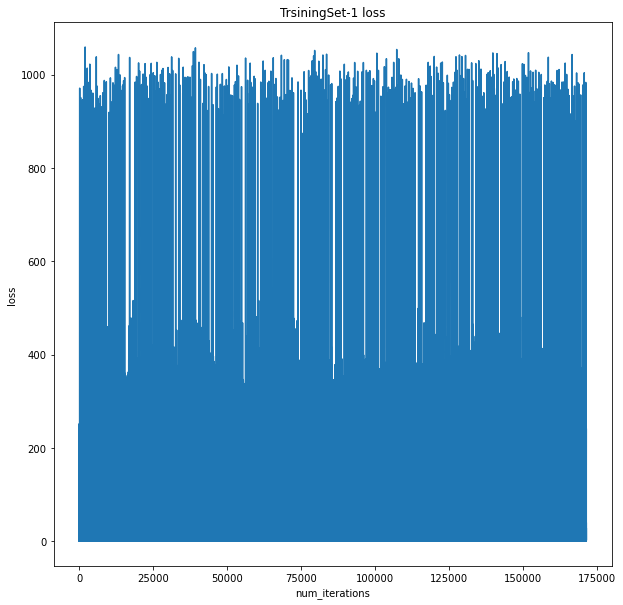

In [12]:
plt.figure(figsize=(10,10))
plt.plot(per1.loss)
plt.xlabel("num_iterations")
plt.ylabel("loss")
plt.title("TrsiningSet-1 loss")
plt.show()

## 3.3 在TrainingSet-2

In [13]:
per2 = Perceptron(fixed_step = True)
per2.train(train2_data, train2_label)
per2.test(test2_data, test2_label)

训练准确率为1.0000，精确度为1.0000，特异度为1.0000
测试准确率为0.8200，精确度为0.8310，特异度为0.8012


(0.82, 0.8309859154929577, 0.8012048192771084)

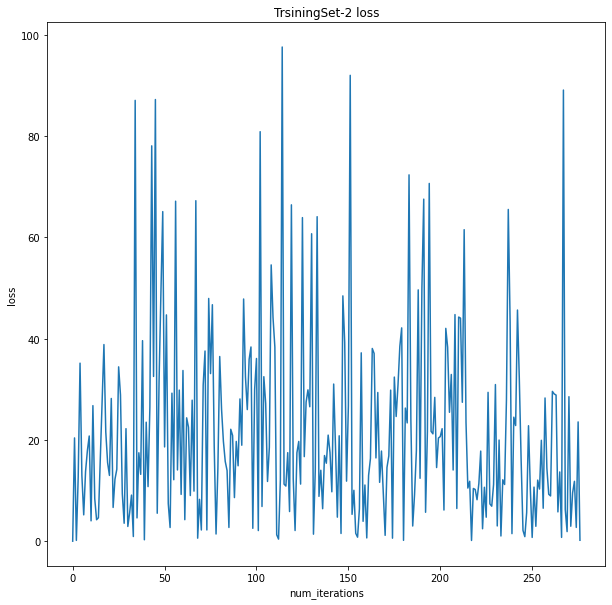

In [14]:
plt.figure(figsize=(10,10))
plt.plot(per2.loss)
plt.xlabel("num_iterations")
plt.ylabel("loss")
plt.title("TrsiningSet-2 loss")
plt.show()

### 3.4 将TrainingSet-2用于TestSet-1和TestSet-2中

### 3.4.1 TestSet-1

In [15]:
print("在TestSet-1中：")
per2.test(test1_data, test1_label)

在TestSet-1中：
测试准确率为0.7739，精确度为0.7745，特异度为0.7733


(0.7739288969917958, 0.7745454545454545, 0.773308957952468)

### 3.4.2 TestSet-2

In [16]:
print("在TestSet-2中：")
per2.test(test2_data, test2_label)

在TestSet-2中：
测试准确率为0.8200，精确度为0.8310，特异度为0.8012


(0.82, 0.8309859154929577, 0.8012048192771084)

### 3.5 将TrainingSet-1用于TestSet-1中

In [17]:
per1.test(test1_data, test1_label)

测试准确率为0.5041，精确度为0.0127，特异度为0.9982


(0.504102096627165, 0.012727272727272728, 0.9981718464351006)

# 4. logistic回归

## 4.1 K折交叉验证

In [18]:
def K_fold_divide(X, Y, K=5):
    classes = np.unique(Y).reshape(-1)
    Y=Y.reshape((-1,1))
    folds = []
    for item in classes:
        x = X[np.where(Y[:,0]==item)]
        y = Y[np.where(Y[:,0]==item)]
        data = np.concatenate([x,y.reshape((-1,1))], axis=1)
        np.random.shuffle(data)
        M=data.shape[0]//K
        if((data.shape[0]-M*K)>0):
            M+=1
    
        for i in range(K):
            valid = data[i*M:min((i+1)*M, data.shape[0])]
            train = np.concatenate([data[0:M*i],data[min((i+1)*M, data.shape[0]):data.shape[0]]], axis = 0)
            train_data = train[:,:data.shape[1]-1]
            train_label = train[:,data.shape[1]-1]
            valid_data = valid[:,:data.shape[1]-1]
            valid_label = valid[:,data.shape[1]-1]
            if(len(folds)<K):
                folds.append([train_data, train_label, valid_data, valid_label])
            else:
                folds[i][0] = np.concatenate([folds[i][0], train_data], axis=0)
                folds[i][1] = np.concatenate([folds[i][1], train_label], axis=0)
                folds[i][2] = np.concatenate([folds[i][2], valid_data], axis=0)
                folds[i][3] = np.concatenate([folds[i][3], valid_label], axis=0)
    
    return folds

In [19]:
K=10

In [20]:
folds = K_fold_divide(train1_data, train1_label, K)

In [21]:
class Logistic_classifier():
    def __init__(self, learning_rate = 0.1, max_epoch = 1000):
        self.omega=0
        self.learning_rate=learning_rate
        self.max_epoch=max_epoch
        self.mean = None
        self.std = None
        self.loss = []
        
    def sigmoid(self, inx):
        where1 = np.where(inx>=0)
        where2 = np.where(inx<0)
        ret = inx
        ret[where1] = 1.0/(1+np.exp(-ret[where1]))
        ret[where2] = np.exp(ret[where2])/(1+np.exp(ret[where2]))
        return ret
        
    def train(self, data, label):
        self.mean = np.mean(data,axis=0,keepdims=True)
        self.std = np.std(data,axis=0,keepdims=True)
        X = data
        X = (data-self.mean)/(self.std+1e-12)
        X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
        Y = np.where(label==0, 1, -1).reshape(-1,1)
        self.omega=0.1*np.ones((X.shape[1],1))
        #self.omega=0.1*np.random.normal(0, 1, (X.shape[1],1))
        for epoch in range(0,self.max_epoch):
            grad=np.mean((X*self.sigmoid(-Y*np.dot(X,self.omega))),axis=0,keepdims=True)#梯度
            #grad=np.mean((Y-self.sigmoid(np.dot(X,self.omega))),axis=0,keepdims=True)#梯度
            self.omega=self.omega+self.learning_rate*grad.T

        F_logistic=self.sigmoid(np.dot(X,self.omega))# logistic函数
        Y_predicted=np.where(F_logistic < 0.5, 1, -1)
        
        error = -np.mean(np.log(F_logistic))
        correct = (Y_predicted == Y).sum()
        accuracy=correct/data.shape[0]
        Y_predicted=np.where(Y_predicted > 0, 2, -1)        
        sensitivity=(Y_predicted == Y).sum()/(Y==-1).sum()
        Y_predicted=np.where(Y_predicted > 0, 1, -2) 
        specificity=(Y_predicted == Y).sum()/(Y==1).sum()
        
        return F_logistic, error, accuracy, sensitivity, specificity

    
    def test(self, data, label):
        X = data
        X = (data-self.mean)/(self.std+1e-12)
        X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
        Y = np.where(label==0, 1, -1).reshape(-1,1)
        F_logistic=self.sigmoid(np.dot(X,self.omega))# logistic函数
        Y_predicted=np.where(F_logistic < 0.5, 1, -1)
        
        error = -np.mean(np.log(F_logistic))
        correct = (Y_predicted == Y).sum()
        accuracy=correct/data.shape[0]
        Y_predicted=np.where(Y_predicted > 0, 2, -1)        
        sensitivity=(Y_predicted == Y).sum()/(Y==-1).sum()
        Y_predicted=np.where(Y_predicted > 0, 1, -2) 
        specificity=(Y_predicted == Y).sum()/(Y==1).sum()
        
        return F_logistic, error, accuracy, sensitivity, specificity

## 4.2 在TrainingSet-1上进行10折交叉验证

In [22]:
LRs = []
train_sigmoid = []
train_error = []
train_accu = []
train_sensi = []
train_speci = []
valid_sigmoid = []
valid_error = []
valid_accu = []
valid_sensi = []
valid_speci = []
print("%-8s%-17s%-17s%-17s%-17s%-17s%-17s%-17s%-17s"%("Fold-K", "train error", "train accuracy", "train sensi", "train speci", "valid error", "valid accuracy", "valid sensi", "valid speci"))
for i in range(K):
    train_data, train_label, valid_data, valid_label = folds[i]
    LRs.append(Logistic_classifier())
    F_logistic, error, accuracy, sensitivity, specificity = LRs[i].train(train_data, train_label)
    train_sigmoid.append(F_logistic)
    train_error.append(error)
    train_accu.append(accuracy)
    train_sensi.append(sensitivity)
    train_speci.append(specificity)
    F_logistic, error, accuracy, sensitivity, specificity = LRs[i].test(valid_data, valid_label)
    valid_sigmoid.append(F_logistic)
    valid_error.append(error)
    valid_accu.append(accuracy)
    valid_sensi.append(sensitivity)
    valid_speci.append(specificity)
    print("%-8d%-17f%-17f%-17f%-17f%-17f%-17f%-17f%-17f"%(i+1, train_error[i], train_accu[i], train_sensi[i], train_speci[i], valid_error[i], valid_accu[i], valid_sensi[i], valid_speci[i]))
print("%-8s%-17f%-17f%-17f%-17f%-17f%-17f%-17f%-17f"%("average", np.mean(train_error), np.mean(train_accu), np.mean(train_sensi), np.mean(train_speci), np.mean(valid_error), np.mean(valid_accu), np.mean(valid_sensi), np.mean(valid_speci)))

Fold-K  train error      train accuracy   train sensi      train speci      valid error      valid accuracy   valid sensi      valid speci      
1       3.538860         0.660889         0.964270         0.345125         3.691850         0.648000         0.960784         0.322449         
2       3.354661         0.655556         0.967320         0.331066         2.931588         0.654000         0.972549         0.322449         
3       3.504067         0.657111         0.964706         0.336961         2.373141         0.630000         0.972549         0.273469         
4       3.580931         0.656222         0.963834         0.336054         3.412089         0.662000         0.976471         0.334694         
5       3.511224         0.658444         0.965577         0.338776         3.764486         0.656000         0.968627         0.330612         
6       3.466856         0.658667         0.967320         0.337415         3.676626         0.658000         0.952941         0.3

## 4.3 在TestSet-1上验证

In [23]:
test_sigmoid = []
test_error = []
test_accu = []
test_sensi = []
test_speci = []
print("%-8s%-17s%-17s%-17s%-17s"%("Fold-K", "test error", "test accuracy", "test sensi", "test speci"))
for i in range(K):
    F_logistic, error, accuracy, sensitivity, specificity = LRs[i].test(test1_data, test1_label)
    test_sigmoid.append(F_logistic)
    test_error.append(error)
    test_accu.append(accuracy)
    test_sensi.append(sensitivity)
    test_speci.append(specificity)
    print("%-8d%-17f%-17f%-17f%-17f"%(i+1, test_error[i], test_accu[i], test_sensi[i], test_speci[i]))
print("%-8s%-17f%-17f%-17f%-17f"%("average", np.mean(test_error), np.mean(test_accu), np.mean(test_sensi), np.mean(test_speci)))

Fold-K  test error       test accuracy    test sensi       test speci       
1       4.052609         0.662716         0.963437         0.363636         
2       3.779657         0.656335         0.965265         0.349091         
3       3.844973         0.662716         0.968921         0.358182         
4       4.051149         0.659070         0.965265         0.354545         
5       3.981001         0.663628         0.967093         0.361818         
6       3.971793         0.663628         0.965265         0.363636         
7       3.987396         0.663628         0.961609         0.367273         
8       3.914078         0.658159         0.963437         0.354545         
9       4.074459         0.664540         0.967093         0.363636         
10      4.161636         0.667274         0.963437         0.372727         
average 3.981875         0.662170         0.965082         0.360909         


## 4.4画出ROC曲线

In [24]:
def calculate_ROC(output, label):
    Y = np.where(label==0, 1, -1).reshape(-1,1)
    thresholds = np.concatenate([np.zeros(1), np.unique(output), np.ones(1)])
    TPRs = []
    FPRs = []
    AUC = 0
    for i in range(thresholds.shape[0]):
        threshold = thresholds[i]
        Y_predicted = np.where(output <= threshold, 1, -1)
        Y_predicted = np.where(Y_predicted > 0, 2, -1)
        TPR = (Y_predicted == Y).sum()/((Y==-1).sum())
        Y_predicted = np.where(Y_predicted > 0, 1, -2)
        FPR = 1-(Y_predicted == Y).sum()/(Y==1).sum()
        TPRs.append(TPR)
        FPRs.append(FPR)
        if(threshold>0):
            AUC+=(TPRs[i]+TPRs[i-1])*(-FPRs[i]+FPRs[i-1])/2
            
    return TPRs, FPRs, AUC

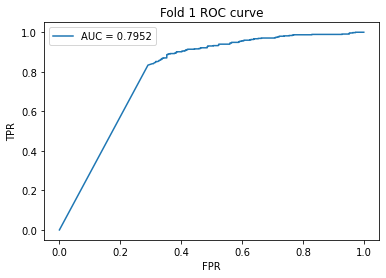

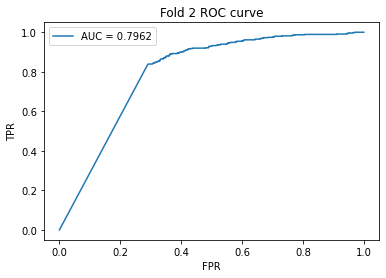

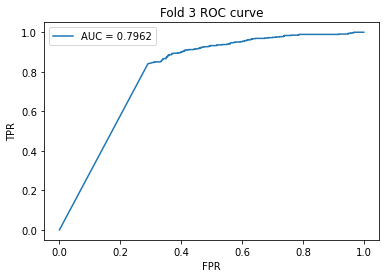

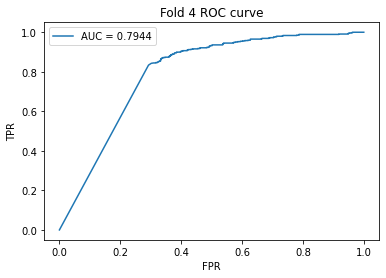

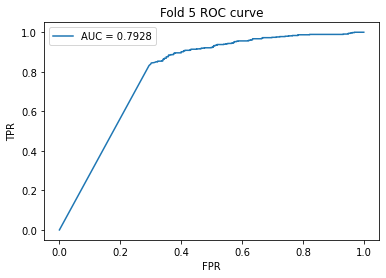

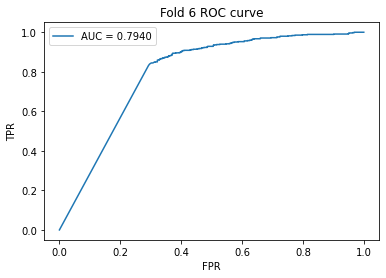

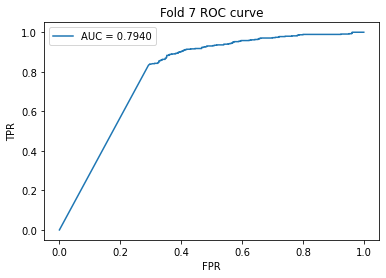

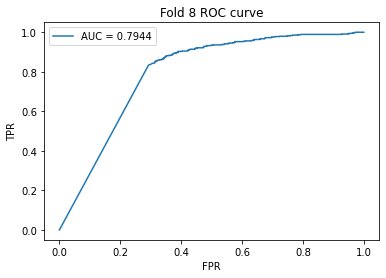

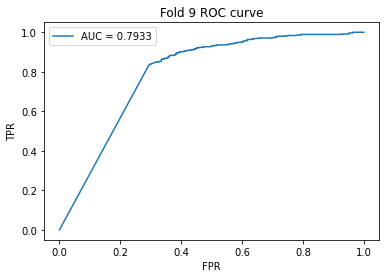

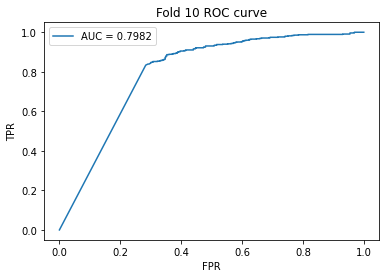

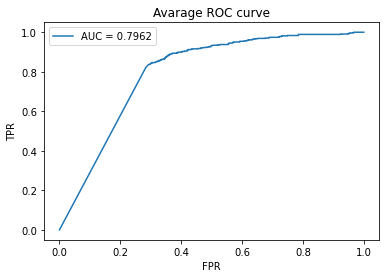

In [25]:
ava_output = None
for i in range(K):
    if(ava_output is None):
        ava_output = test_sigmoid[i]/K
    else:
        ava_output += test_sigmoid[i]/K
    TPRs, FPRs, AUC = calculate_ROC(test_sigmoid[i], test1_label)
    plt.figure()
    plt.title("Fold %d ROC curve"%(i+1))
    plt.plot(FPRs, TPRs)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(["AUC = %.4f"%(AUC)])
    plt.show()

TPRs, FPRs, AUC = calculate_ROC(ava_output, test1_label)
plt.figure()
plt.title("Avarage ROC curve")
plt.plot(FPRs, TPRs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(["AUC = %.4f"%(AUC)])
plt.show()

## 4.5 计算特征重要性

### 4.5.1 获取每一项参数的名字

In [26]:
header_name = np.concatenate([np.array(["intercept"]), np.array(pd.read_csv("./data1forEx1to4/train1_icu_data.csv", header = None).iloc[0])])
header_name

array(['intercept', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'arf_apache', 'bun_apache',
       'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'sodium_apache', 'temp_apache',
       'ventilated_apache', 'wbc_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_max', 'h1_sysbp_min', 'h1_temp_max', 'h1_temp_min',
       'd1

### 4.5.2比较系数绝对值大小进行重要性排序

In [27]:
ava_omega = None
for i in range(K):
    if(ava_omega is None):
        ava_omega = LRs[i].omega.reshape(-1)/K
    else:
        ava_omega += LRs[i].omega.reshape(-1)/K
        
importance_sort_index1 = np.argsort(np.abs(ava_omega))
print("根据系数绝对值大小得到的参数重要性排序为：")
for index, item in enumerate((header_name[importance_sort_index1])[::-1]):
    print("%d.\t%s"%(index+1, item))

根据系数绝对值大小得到的参数重要性排序为：
1.	intercept
2.	apache_4a_icu_death_prob
3.	gcs_motor_apache
4.	gcs_eyes_apache
5.	d1_temp_min
6.	gcs_verbal_apache
7.	ventilated_apache
8.	d1_spo2_min
9.	intubated_apache
10.	temp_apache
11.	d1_hco3_min
12.	bun_apache
13.	d1_sysbp_min
14.	wbc_apache
15.	h1_temp_min
16.	h1_temp_max
17.	d1_mbp_min
18.	d1_potassium_max
19.	d1_calcium_min
20.	d1_hco3_max
21.	d1_heartrate_max
22.	creatinine_apache
23.	d1_diasbp_min
24.	h1_spo2_min
25.	h1_resprate_min
26.	apache_2_bodysystem_Undefined diagnoses
27.	h1_resprate_max
28.	apache_3j_diagnosis
29.	elective_surgery
30.	cirrhosis
31.	apache_2_bodysystem_Cardiovascular
32.	glucose_apache
33.	solid_tumor_with_metastasis
34.	pre_icu_los_days
35.	d1_resprate_max
36.	apache_2_diagnosis
37.	h1_mbp_min
38.	immunosuppression
39.	age
40.	h1_sysbp_min
41.	hepatic_failure
42.	heart_rate_apache
43.	apache_3j_bodysystem_Sepsis
44.	h1_spo2_max
45.	resprate_apache
46.	apache_2_bodysystem_Metabolic
47.	apache_3j_bodysystem_Metabolic
48.	h1_di

### 4.5.3使用statsmodels进行特征重要性排序

In [28]:
import statsmodels.api as sma

In [29]:
lr=sma.Logit(train1_label, np.concatenate([np.ones((train1_data.shape[0],1)), train1_data], axis = 1))
result=lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.429116
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4903
Method:                           MLE   Df Model:                           96
Date:                Wed, 06 Oct 2021   Pseudo R-squ.:                  0.3807
Time:                        21:17:41   Log-Likelihood:                -2145.6
converged:                       True   LL-Null:                       -3464.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8096        nan        nan        nan         nan         nan
x1             0.0258      0.003      8.545      0.000       0.020       0.032
x2             0.0229      0.025      0.924      0.355      -0.026       0.072
x3            -0.5824      0.241     -2.421      0.015      -1.054      -0.111
x4             0.0036      0.010      0.349      0.727      -0.017       0.024
x5             0.0619      0.016      3.846      0.000       0.030       0.094
x6            -0.0102      0.009     -1.148      0.251      -0.028       0.007
x7             0.0010      0.001      1.662      0.096      -0.000       0.002
x8            -0.0003      0.000     -1.197      0.231      -0.001       0.000
x9             0.3791      0.248      1.527      0.127      -0.107       0.866
x10            0.0124      0.003      4.593      0.000       0.007       0.018
x11            0.0182      0.040      0.452      0.651      -0.061       0.097
x12           -0.0780      0.068     -1.150      0.250      -0.211       0.055
x13           -0.1501      0.044     -3.384      0.001      -0.237      -0.063
x14           -0.0672      0.038     -1.746      0.081      -0.143       0.008
x15           -0.0007      0.001     -1.314      0.189      -0.002       0.000
x16            0.0008      0.002      0.339      0.735      -0.004       0.005
x17            0.0325      0.012      2.808      0.005       0.010       0.055
x18            0.1017      0.115      0.883      0.377      -0.124       0.327
x19            0.0016      0.001      1.537      0.124      -0.000       0.004
x20            0.0049      0.004      1.340      0.180      -0.002       0.012
x21           -0.0396      0.016     -2.496      0.013      -0.071      -0.008
x22            0.0033      0.066      0.051      0.960      -0.126       0.133
x23            0.7954      0.107      7.436      0.000       0.586       1.005
x24            0.0298      0.006      5.264      0.000       0.019       0.041
x25            0.0031      0.004      0.726      0.468      -0.005       0.012
x26            0.0016      0.007      0.226      0.821      -0.012       0.015
x27            0.0142      0.004      3.996      0.000       0.007       0.021
x28            0.0069      0.003      2.384      0.017       0.001       0.013
x29           -0.0062      0.005     -1.275      0.202      -0.016       0.003
x30           -0.0069      0.007     -0.947      0.344      -0.021       0.007
x31            0.0061      0.005      1.220      0.223      -0.004       0.016
x32         6.814e-05      0.010      0.007      0.994      -0.019       0.019
x33           -0.0784      0.039     -1.997      0.046      -0.155      -0.001
x34           -0.0246      0.004     -5.714      0.000      -0.033      -0.016
x35           -0.0014      0.003     -0.469      0.639      -0.007       0.004
x36           -0.0094      0.004     -2.417      0.016      -0.017      -0.002
x37            0.1602      0.062      2.582      0.010       0.039       0.282
x3

In [30]:
importance_sort_index2 = np.argsort(np.array(result.pvalues))
print("根据p值大小得到的参数重要性排序为：")
for index, item in enumerate(header_name[importance_sort_index2]):
    print("%d.\t%s"%(index+1, item))

根据p值大小得到的参数重要性排序为：
1.	age
2.	ventilated_apache
3.	apache_4a_icu_death_prob
4.	d1_spo2_min
5.	wbc_apache
6.	solid_tumor_with_metastasis
7.	bun_apache
8.	d1_hemaglobin_max
9.	d1_temp_min
10.	d1_heartrate_max
11.	pre_icu_los_days
12.	gcs_motor_apache
13.	d1_calcium_min
14.	immunosuppression
15.	h1_sysbp_min
16.	h1_heartrate_max
17.	d1_calcium_max
18.	hepatic_failure
19.	hematocrit_apache
20.	h1_mbp_min
21.	d1_platelets_max
22.	d1_temp_max
23.	sodium_apache
24.	cirrhosis
25.	elective_surgery
26.	d1_sysbp_min
27.	d1_heartrate_min
28.	h1_resprate_min
29.	d1_spo2_max
30.	gcs_verbal_apache
31.	h1_spo2_min
32.	h1_temp_max
33.	apache_2_diagnosis
34.	h1_resprate_max
35.	d1_potassium_max
36.	map_apache
37.	arf_apache
38.	resprate_apache
39.	glucose_apache
40.	d1_mbp_max
41.	d1_sodium_max
42.	d1_resprate_max
43.	d1_glucose_min
44.	apache_3j_diagnosis
45.	gcs_eyes_apache
46.	weight
47.	diabetes_mellitus
48.	d1_hco3_max
49.	h1_spo2_max
50.	h1_diasbp_max
51.	d1_mbp_min
52.	bmi
53.	intubated_apache
54.